# Описание проекта

В проекте используютсяданные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Общие данные

***Цели***:   

***1.Изучить предоставленные данные.***   

***2. Выполнить предобработку данных и изучить их. Выполнить преобразования, необходимые для дальнейшего анализа.***

***3. Провести исследовательский анализ данных и ответить на поставленные вопросы.***  
 - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
 - Не учитывайте в работе данные за предыдущие годы. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
 - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
 - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
 - Соотнесите выводы с продажами игр на других платформах.
 - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
 
***4. Составьте портрет пользователя каждого региона***
    Определите для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясните разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
 
***5. Проверьте гипотезы***
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 - Задайте самостоятельно пороговое значение alpha.
    Поясните:
     - Как вы сформулировали нулевую и альтернативную гипотезы;
     - Какой критерий применили для проверки гипотез и почему.
     
***6. Напишите общий вывод***
 

***Описание данных:***
 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
 
Данные за 2016 год могут быть неполными.

### Изучим общую информацию. 


#### Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv', sep=',')
except:
    data = pd.read_csv('games.csv', sep=',')   

#### Выведим первые 10 строчек датафрейма data на экран.

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


(16715, 11)

***Вывели общую информацию. Датафрейм состоит из 16715 строк и 11. Большая часть пропушенных значений находится в столбцах с оценками и рейтингом ESRB.***

## Предобработка данных

### Заменим названия столбцов (приведите к нижнему регистру)

In [5]:
data.columns = map(str.lower, data.columns)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработайте пропуски при необходимости, преобразуйте данные в нужные типы. 

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

***Как мы видим больше всего пропусков в столбцах с оценками. Обработать их нет возможности т.к. всё это оценки пользователей\критиков, и зачастую они являются оценочным суждением, и применять к пропускам среднее значение или медиану будет не корректно***

In [7]:
data.duplicated().sum()

0

***Явных дубликатов не обнуржено***

In [8]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
data = data.dropna(subset=['name'])

***Как мы видим пропуски в столбце `year` и `genre` совпадают, игры выпущены в 1993г. и они никак не повлияют на определение успешности в 2017г, поэтому мы можем их удалить.***

In [10]:
data = data.dropna(subset=['year_of_release'])

In [11]:
data['rating'] = data['rating'].fillna('no info')

***Пропуски в разделе `rating` заменим на значение `no info`, что бы они не мешали нам в дальнейших вычеслениях. Пропуски в столбце `year_of_release` удалим т.к. лишь малая часть из них попадает в исследуемый период, и они не повлияют на результат.***

In [12]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [13]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN, regex=True)

In [14]:
data['user_score'] = data['user_score'].astype('float64')

***Преобразуем столбец `year` в целочисленные значения и столбец `user_score` в вещественные, предаврительно заменив "tbd" на NaN. Вероятнее всего сокращение "tbd" в данном контексте значит "To Be Determined" или "Будет опеределно позже" т.е. игроки еще не поставили свою оценку после покупки игры, поэтому заменяем на NaN.***

#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [15]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [16]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


## Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

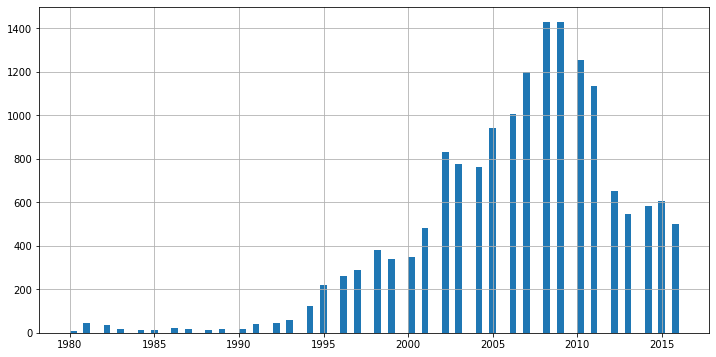

In [17]:
data['year_of_release'].hist(bins = 90, figsize = (12,6));

***Мы видим, что пик релизов приходиться на 2008-2009г. Гистограмма скошена вправо, это логично, ведь в период до 1995г. индустрия игр была развята слабо, по причине отсутствия относительно мощной техники. Так же наблюдается спад в период 2013-2015г. Возможно это связано с тем, что после выпуска игр, студиям нужно время для создаяния новой игры.***

### Посмотрите, как менялись продажи по платформам.

In [18]:
data.pivot_table(index='platform', values='total_sales', aggfunc=['sum']).\
sort_values(by = ('sum','total_sales'), ascending=False).\
style.background_gradient(subset = 'sum', vmin=0, vmax=1300)

,sum
,total_sales
platform,
PS2,1233.560000
X360,961.240000
PS3,931.340000
Wii,891.180000
DS,802.780000
PS,727.580000
PS4,314.140000
GBA,312.880000


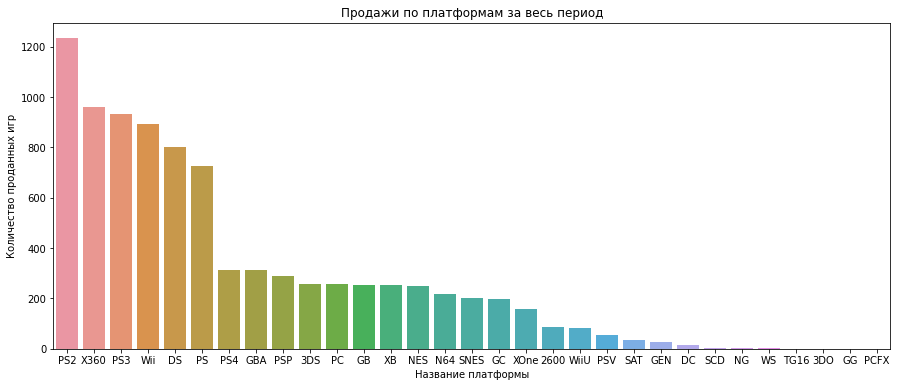

In [19]:
tsp = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').\
sort_values(by = 'total_sales',ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(x=tsp.index,y=tsp['total_sales'])
plt.title('Продажи по платформам за весь период')
plt.xlabel('Название платформы')
plt.ylabel('Количество проданных игр');


***Как мы видим по общим продажам, больше всего проданных игр у PS2, следом идет группа: Х360, PS3, Wii, DS и PS.***

#### Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

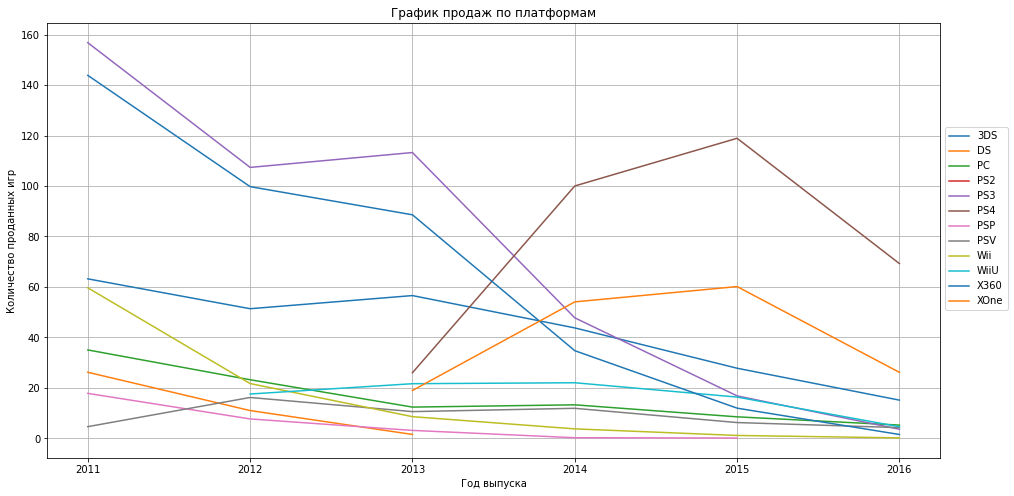

In [20]:

data[data['year_of_release']>2010].pivot_table(index='year_of_release', columns = 'platform',\
values='total_sales', aggfunc='sum').plot(grid=True, figsize=(16, 8), title = 'График продаж по платформам',\
xlabel='Год выпуска', ylabel='Количество проданных игр', )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.55));

***Как мы видим, продолжительность жизни большинства платформ составляет 10 лет. В первую половину идет резкий рост продаж, а во вторую спад. В дальнейшем платформа либо обновляется, либо на нее перестают выпускать игры.***

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [21]:
data[data['year_of_release']>2012].pivot_table(index='platform', columns = 'year_of_release',\
values='total_sales', aggfunc='sum')

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
DS,1.54,NaN,NaN,NaN
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSP,3.14,0.24,0.12,NaN
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60


***Из сводной таблицы по продажам за псоледние несколько лет видно, что с большим отрывом лидирует PS4, следом идет XOne. Их более ранние версии (PS3 и Х360) теряют продужи. Так же падают в продажах 3DS и WiiU, но все еще достаточно популярны. Исходя из динамики продаж можно предположить, что самыми популярными платформами будут эти 4: PS4, XOne, 3DS, WiiU и PC. Их и рассмотрим более подробно. Акутальным периодом будем считать 2014-2016г., т.к. с 2014г старые платформы доживают свое, а новые начинают развиваться.***

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [22]:
profit_platform = data[data['year_of_release'] >= 2014]

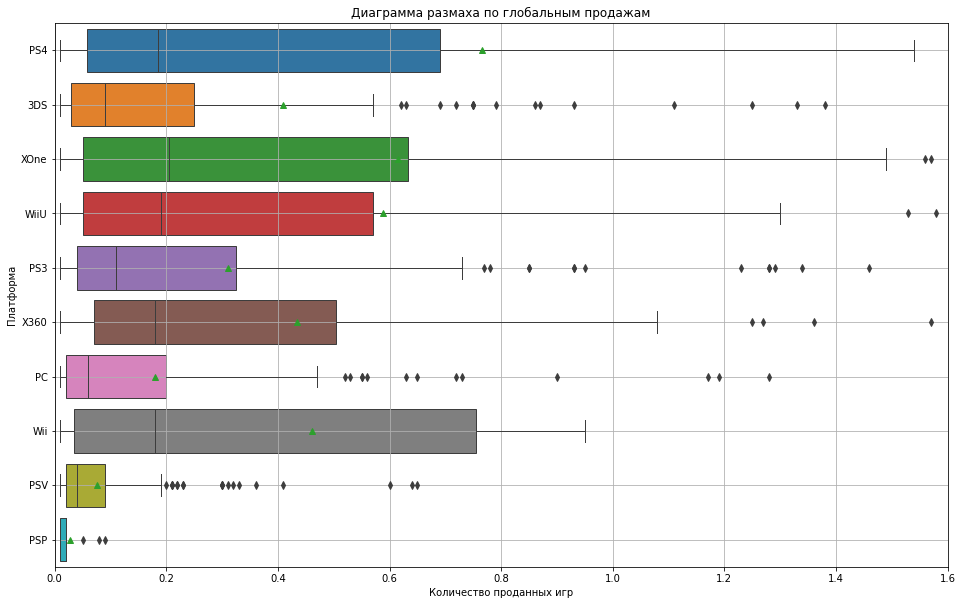

In [23]:
plt.figure(figsize=(16,10))
plt.xlim(0, 1.6)
sns.boxplot(x=profit_platform['total_sales'],
            y=profit_platform['platform'],
           showmeans=True,
           linewidth=True)
plt.grid(True)
plt.xlabel('Количество проданных игр')
plt.ylabel('Платформа')
plt.title('Диаграмма размаха по глобальным продажам');

- ***Как мы видими из общей группы сразу выбиваются PS4 и XOne, WiiU, у них у всех высокие продажи и большая разница между медианой и средним значением. Это говорит о том,  что на этих платформах выпускаются игры с очень высокими продажами, соответственно их популярность растет.Туда же можно отнести и 3DS, хоть общие продажи там и меньше.*** 

- ***PS3, X360, Wii, PSV теряют популрность, их обще продажи уменьшаются, сердние значения приблежаются к медианным.***

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

***Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами на платформе PS4.***

In [24]:
data[(data['year_of_release']>=2014) &(data['platform']=='PS4')]['total_sales'].corr(data['user_score'])

-0.040131589472697356

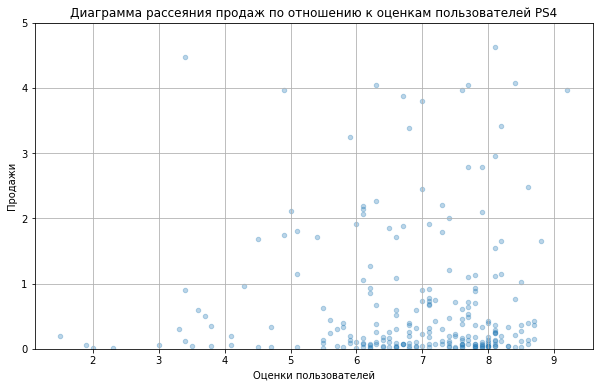

In [25]:
data[(data['year_of_release']>=2014) & (data['platform']=='PS4')].plot(x='user_score', y='total_sales', kind='scatter',\
alpha=0.3, figsize= (10,6), grid=True, xlabel = 'Оценки пользователей', ylabel = 'Продажи', ylim=(0,5),\
title = 'Диаграмма рассеяния продаж по отношению к оценкам пользователей PS4');

***Как мы видим корреляция почти нулевая, что подтверждается графиком. Прямой зависимости между продажами и отзывами пользоватлей не обнаружено.***

In [26]:
data[(data['year_of_release']>=2014) & (data['platform']=='PS4')]['total_sales'].corr(data['critic_score'])

0.40266141068104083

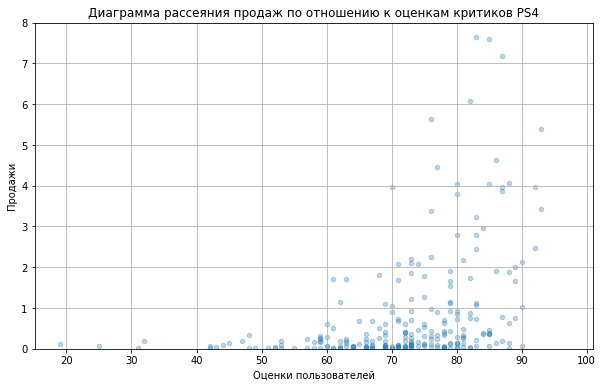

In [27]:
data[(data['year_of_release']>=2014) & (data['platform']=='PS4')].plot(x='critic_score', y='total_sales', kind='scatter',\
alpha=0.3, figsize= (10,6), grid=True, xlabel = 'Оценки пользователей', ylabel = 'Продажи', ylim=(0,8),\
title = 'Диаграмма рассеяния продаж по отношению к оценкам критиков PS4');

***В случае с оценками критиков ситуация немного изменилась. Мы видим, что зависимость есть, выражена умеренно. Это можно объяснить тем, что возможно, часть пользователей при покупке игр все же опирается на мнение критиков.***

#### Соотнесите выводы с продажами игр на других платформах.

***Рассмотрим платформу Xone.***

In [28]:
data[(data['year_of_release']>=2014) & (data['platform']=='XOne')]['total_sales'].corr(data['user_score'])

-0.0703839280647581

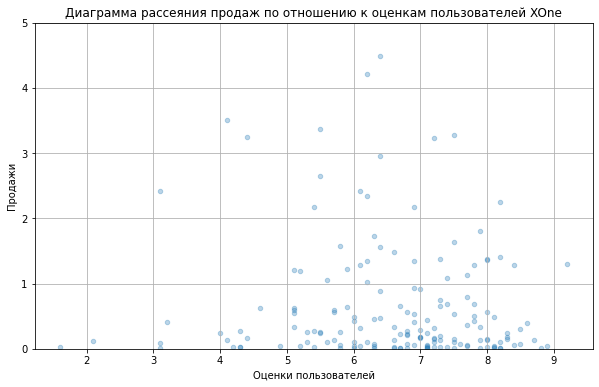

In [29]:
data[(data['year_of_release']>=2014) & (data['platform']=='XOne')].plot(x='user_score', y='total_sales', kind='scatter',\
alpha=0.3, figsize= (10,6), grid=True, xlabel = 'Оценки пользователей', ylabel = 'Продажи', ylim=(0,5),\
title = 'Диаграмма рассеяния продаж по отношению к оценкам пользователей XOne');

In [30]:
data[(data['year_of_release']>=2014) & (data['platform']=='XOne')]['total_sales'].corr(data['critic_score'])

0.42867694370333226

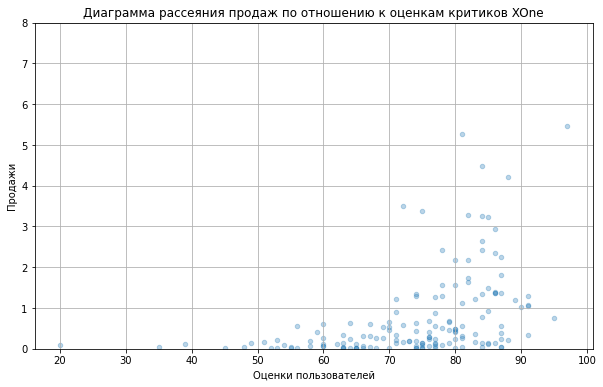

In [31]:
data[(data['year_of_release']>=2014) & (data['platform']=='XOne')].plot(x='critic_score', y='total_sales', kind='scatter',\
alpha=0.3, figsize= (10,6), grid=True, xlabel = 'Оценки пользователей', ylabel = 'Продажи', ylim=(0,8),\
title = 'Диаграмма рассеяния продаж по отношению к оценкам критиков XOne');

***Полученные значения Xone очень схожи с показаниями PS4. Зависимость между оценками пользователей и продажами почти нулевая. Зависмость между продажами и оценками критиков тут чуть выше, умеренная.*** 

***Рассмотрим платформу WiiU.*** 

In [32]:
data[(data['year_of_release']>=2014) & (data['platform']=='WiiU')]['total_sales'].corr(data['user_score'])

0.4079264579217078

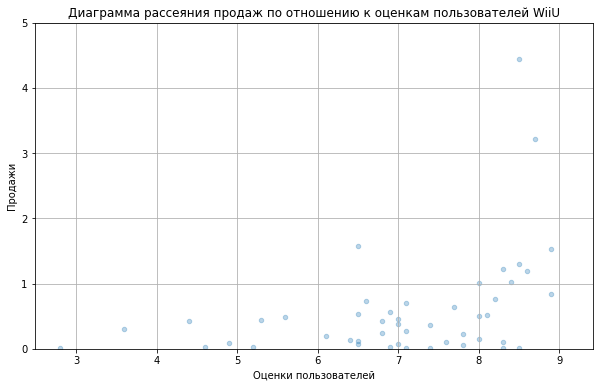

In [33]:
data[(data['year_of_release']>=2014) & (data['platform']=='WiiU')].plot(x='user_score', y='total_sales', kind='scatter',\
alpha=0.3, figsize= (10,6), grid=True, xlabel = 'Оценки пользователей', ylabel = 'Продажи', ylim=(0,5),\
title = 'Диаграмма рассеяния продаж по отношению к оценкам пользователей WiiU');

In [34]:
data[(data['year_of_release']>=2014) & (data['platform']=='WiiU')]['total_sales'].corr(data['critic_score'])

0.370201412480884

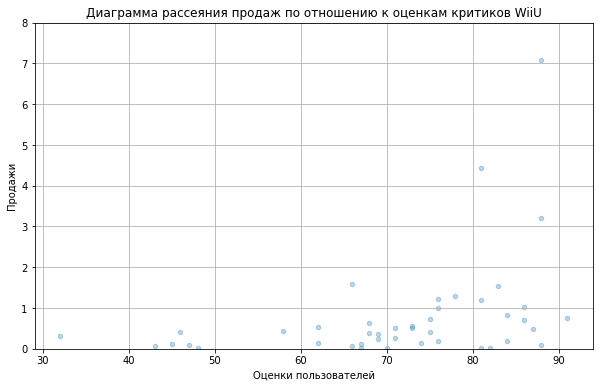

In [35]:
data[(data['year_of_release']>=2014) & (data['platform']=='WiiU')].plot(x='critic_score', y='total_sales', kind='scatter',\
alpha=0.3, figsize= (10,6), grid=True, xlabel = 'Оценки пользователей', ylabel = 'Продажи', ylim=(0,8),\
title = 'Диаграмма рассеяния продаж по отношению к оценкам критиков WiiU');

***Пользователи платформы WiiU больше ореинтируются на отзывы пользователей. Тут значения корреляции намного выше в сравнение с двумя другими платформами.***

***Рассмотрим платформу 3DS***

In [36]:
data[(data['year_of_release']>=2014) & (data['platform']=='3DS')]['total_sales'].corr(data['user_score'])

0.2151932718527028

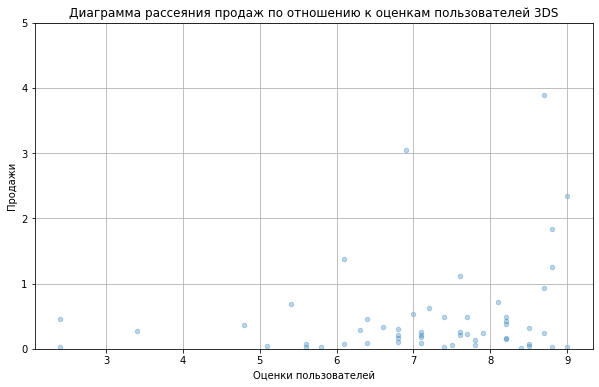

In [37]:
data[(data['year_of_release']>=2014) & (data['platform']=='3DS')].plot(x='user_score', y='total_sales', kind='scatter',\
alpha=0.3, figsize= (10,6), grid=True, xlabel = 'Оценки пользователей', ylabel = 'Продажи', ylim=(0,5),\
title = 'Диаграмма рассеяния продаж по отношению к оценкам пользователей 3DS');

In [38]:
data[(data['year_of_release']>=2014) & (data['platform']=='3DS')]['total_sales'].corr(data['critic_score'])

0.31411749286905105

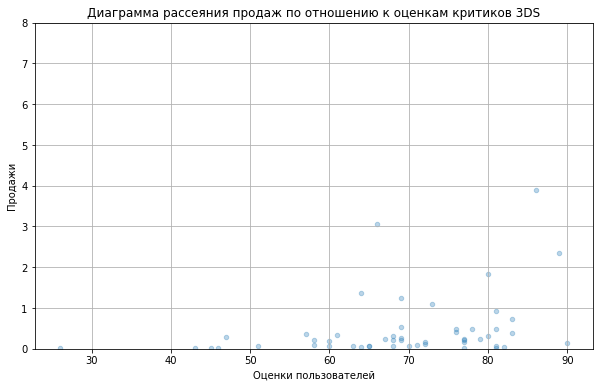

In [39]:
data[(data['year_of_release']>=2014) & (data['platform']=='3DS')].plot(x='critic_score', y='total_sales', kind='scatter',\
alpha=0.3, figsize= (10,6), grid=True, xlabel = 'Оценки пользователей', ylabel = 'Продажи', ylim=(0,8),\
title = 'Диаграмма рассеяния продаж по отношению к оценкам критиков 3DS');

***Как мы видим продажи на платформе 3DS имеют слабо выраженную зависмость по отношению к оценкам пользователей.К оценкам критиков прислушиваются чуть больше.***

***Рассмотрим платформу PC***

In [40]:
data[(data['year_of_release']>=2014) & (data['platform']=='PC')]['total_sales'].corr(data['user_score'])

-0.07159665703472452

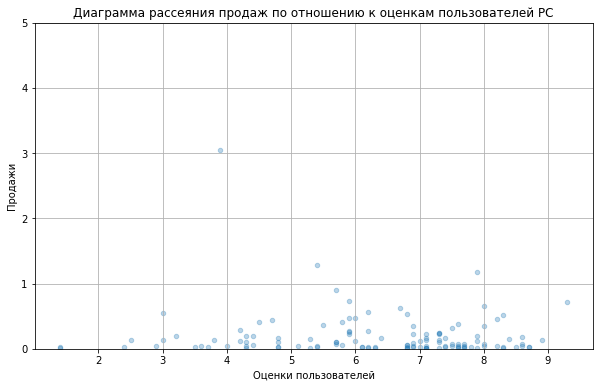

In [41]:
data[(data['year_of_release']>=2014) & (data['platform']=='PC')].plot(x='user_score', y='total_sales', kind='scatter',\
alpha=0.3, figsize= (10,6), grid=True, xlabel = 'Оценки пользователей', ylabel = 'Продажи', ylim=(0,5),\
title = 'Диаграмма рассеяния продаж по отношению к оценкам пользователей PC');

In [42]:
data[(data['year_of_release']>=2014) & (data['platform']=='PC')]['total_sales'].corr(data['critic_score'])

0.17463413769350036

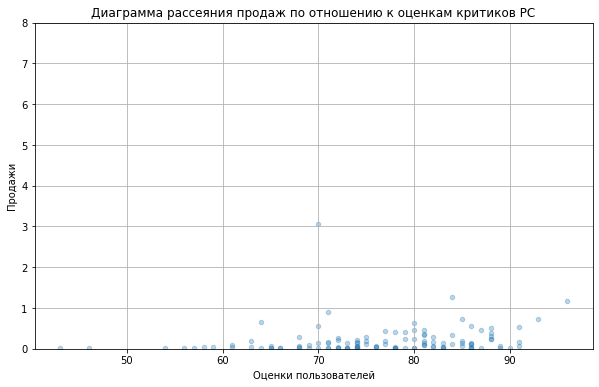

In [43]:
data[(data['year_of_release']>=2014) & (data['platform']=='PC')].plot(x='critic_score', y='total_sales', kind='scatter',\
alpha=0.3, figsize= (10,6), grid=True, xlabel = 'Оценки пользователей', ylabel = 'Продажи', ylim=(0,8),\
title = 'Диаграмма рассеяния продаж по отношению к оценкам критиков PC');

***Для платформы PC, взаимосвязь между продажами либо отсутствует(оценки пользователей), либо очень слабая (оценки криткиов).***

#### Распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

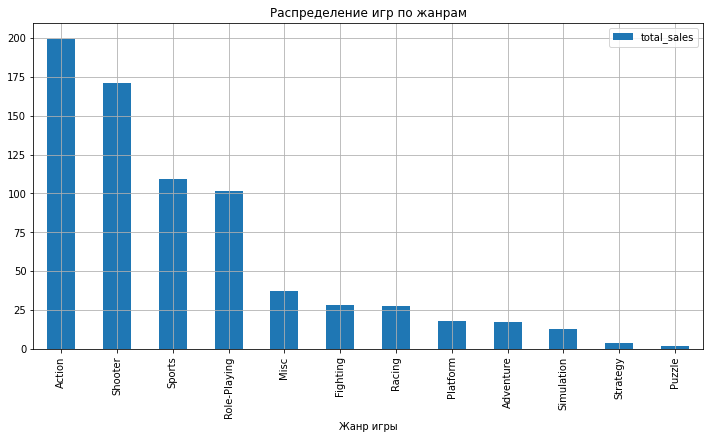

In [44]:
data[data['year_of_release']>=2014].pivot_table(index='genre', values='total_sales', aggfunc='sum').\
sort_values(by = 'total_sales',ascending=False).plot(kind='bar', grid='True',\
figsize=(12,6), xlabel='Жанр игры', title='Распределение игр по жанрам');

***Самыми продаваемыми оказались игры с жанром Action, наменьшее количество продаж у пазлов и стратегий.***

***Общие продажи не всегда показательны. Расичтаем коэфициент отношения общих продаж к выпущенным играм, по жанрам.***

In [45]:
sales_coef = data[data['year_of_release']>=2014].groupby('genre').agg(genre_count=('genre','count'),\
                                                                      total_sales_sum=('total_sales', 'sum'))
sales_coef = sales_coef.reset_index()
sales_coef['coef'] = sales_coef['total_sales_sum']/sales_coef['genre_count']

sales_coef.sort_values(by='coef', ascending=False).style.background_gradient(subset = 'coef', vmin=0, vmax=1)

,genre,genre_count,total_sales_sum,coef
8,Shooter,128,170.940000,1.335469
10,Sports,161,109.480000,0.680000
4,Platform,38,18.090000,0.476053
2,Fighting,60,28.220000,0.470333
7,Role-Playing,221,101.440000,0.459005
6,Racing,69,27.520000,0.398841
3,Misc,113,37.550000,0.332301
0,Action,619,199.360000,0.322068
9,Simulation,44,13.130000,0.298409
5,Puzzle,14,2.210000,0.157857


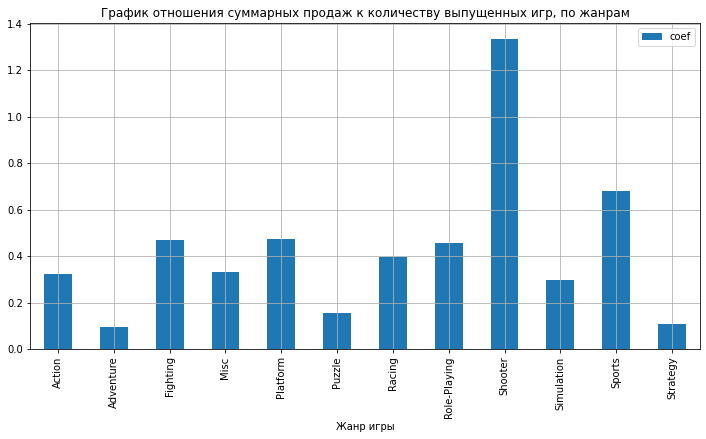

In [46]:
sales_coef.plot(kind='bar',x='genre', y='coef', grid='True',\
figsize=(12,6), xlabel='Жанр игры', title='График отношения суммарных продаж к количеству выпущенных игр, по жанрам');

***Из вычеслений мы видим, что хоть игры в жанре Action и являются самыми продаваемыми, по соотношению количества выпущенных игр к продажам более популярными в актульный период, у пользователей оказались игры в жанре Shooter и Sports. Это так же может говорить о том, что в жанре Action большая конкуренция.***

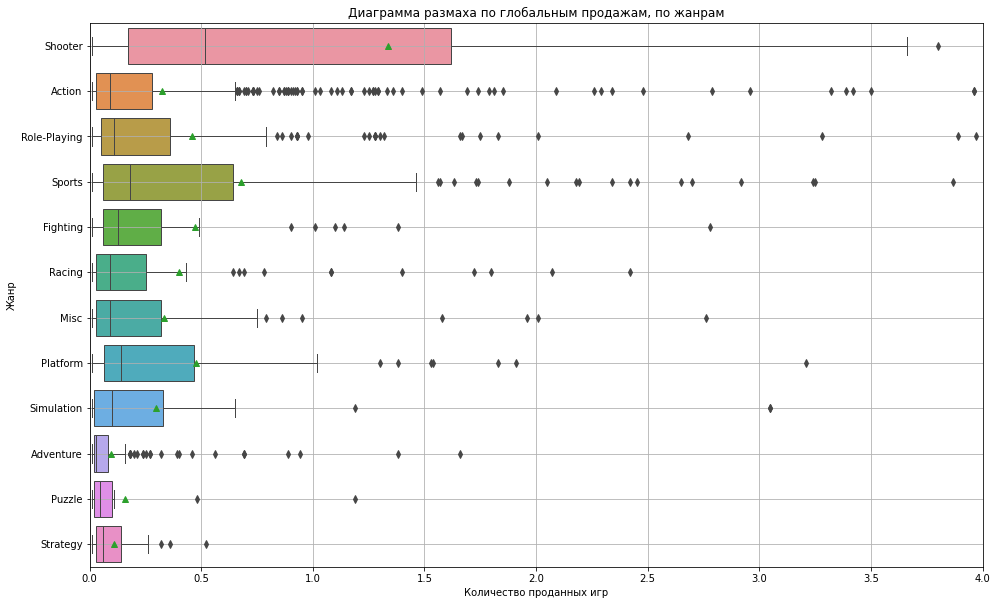

In [47]:
plt.figure(figsize=(16,10))
plt.xlim(0,4)
sns.boxplot(y=profit_platform['genre'],
            x=profit_platform['total_sales'],
           showmeans=True,
           linewidth=True)
plt.grid(True)
plt.xlabel('Количество проданных игр')
plt.ylabel('Жанр')
plt.title('Диаграмма размаха по глобальным продажам, по жанрам');

***Из диаграммы видно, что наиболее стабильно себя показывает жанр Shooter, Sports и Platform. У них достаточно высоко находятся показатели 0.25 кваньтили, и разница между медианой и средним по сравнению с другими меньше.***

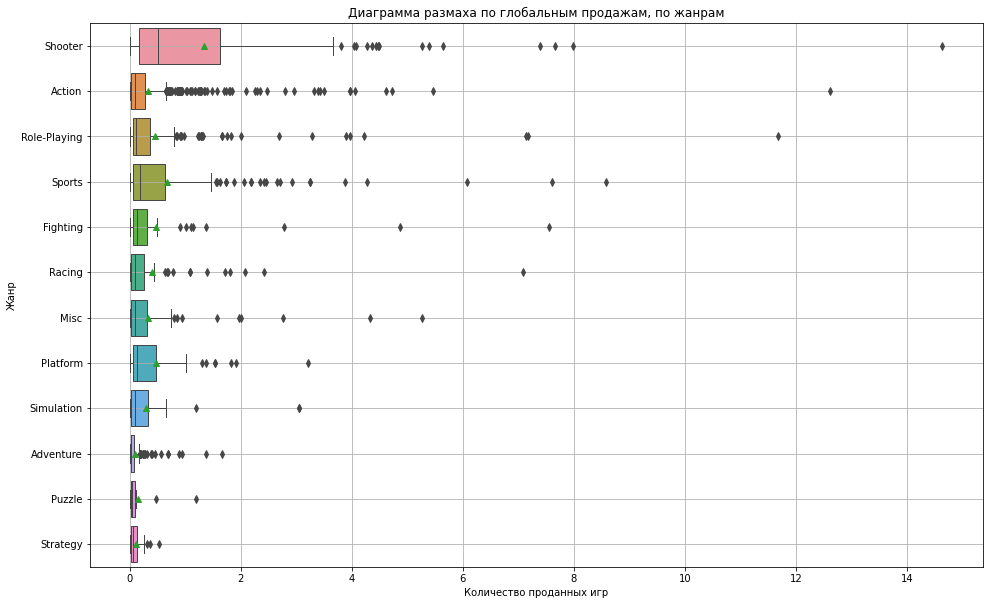

In [48]:
# check
plt.figure(figsize=(16,10))

sns.boxplot(y=profit_platform['genre'],
            x=profit_platform['total_sales'],
           showmeans=True,
           linewidth=True)
plt.grid(True)
plt.xlabel('Количество проданных игр')
plt.ylabel('Жанр')
plt.title('Диаграмма размаха по глобальным продажам, по жанрам');

***Краткий вывод:***
 - Больше всего игр продавалось в период 2008-2009г. В среднем продолжительность жизни платформы 10 лет.
 - За последние несколько лет наиболее популярыми платформами стали PS4, XOne, 3DS и WiiU. PC занимает свою нишу и держит уровень продаж.
 - Для платформ PS4, XOne, 3DS, PC отзывы пользователей напрямую не влияют на количество продаж. Отзывы критиков оказывают умеренное влияние для всех кроме PC, там влияние выражено слабо. Для WiiU все отзывы оказывают умеренное влияние на продажи.
 - Наиболее продаваемыми жанрами оказались Action, Shooter, Sports, RPG.

## Составьте портрет пользователя каждого региона

### Самые популярные платформы (топ-5) для пользователей каждого региона (NA, EU, JP)

In [49]:
data[data['year_of_release']>=2014].pivot_table(index='platform', values='na_sales', aggfunc='sum').\
sort_values(by = 'na_sales',ascending=False).head()

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


***Самыми популярными платформами в Северной Америке оказались PS4 и Xone. Старая модель Х360 еще так же пользуется популярностью. Замыкают пятерку ЗDS и PS3.***

In [50]:
data[data['year_of_release']>=2014].pivot_table(index='platform', values='eu_sales', aggfunc='sum').\
sort_values(by = 'eu_sales',ascending=False).head()


,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


***В Европе наибольшей популярностью пользуются консоли PS4. ХOne значительно уступает им,(более чем в 2.5 раза) хотя в Америке разница была не столь велика. Так же в Европе еще популярны PS3. В списке так же появилась PC, чего в Америке не наблюдалось.***

In [51]:
data[data['year_of_release']>=2014].pivot_table(index='platform', values='jp_sales', aggfunc='sum').\
sort_values(by = 'jp_sales',ascending=False).head()

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


***В Японии картина меняется. Лидирует с большим отрывом портативная консоль 3DS, на 3 месет PSV, так же замыкает пятерку лидеров WiiU. Целых 3 портивыне консоли в топ 5. Вероятно японцы любят играть по дороге на работу, в метро, итд. и там портативные консоли очень удобны и популярны. В топ 5, нет консолей Xbox. На втором PS4, на четвертом PS3.***

In [52]:
actual = data[data['year_of_release']>=2014]

In [53]:
eu_pie = actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
na_pie = actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
jp_pie = actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

In [54]:
top5_eu = eu_pie.head().index
top5_na = na_pie.head().index
top5_jp = jp_pie.head().index

In [55]:
for i in jp_pie.index:
    if i in top5_jp:
        pass
    else:
        jp_pie.rename(index={i:'Other'}, inplace=True)

In [56]:
for z in eu_pie.index:
    if z in top5_eu:
        pass
    else:
        eu_pie.rename(index={z:'Other'}, inplace=True)

In [57]:
for q in na_pie.index:
    if q in top5_na:
        pass
    else:
        na_pie.rename(index={q:'Other'}, inplace=True)

In [58]:
eu_pie = eu_pie.reset_index().groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
na_pie = na_pie.reset_index().groupby('platform')['na_sales'].sum().sort_values(ascending=False)
jp_pie = jp_pie.reset_index().groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

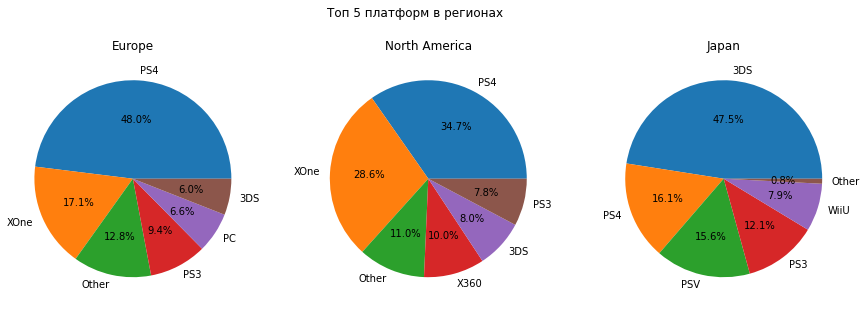

In [59]:
plt.suptitle('Топ 5 платформ в регионах', fontsize="large")


plt.subplot(1, 3, 1)
eu_pie.plot.pie(figsize=(15,5), autopct="%.1f%%", ylabel='', title='Europe')

plt.subplot(1, 3, 2)
na_pie.plot.pie(figsize=(15,5), autopct="%.1f%%", ylabel='', title='North America')

plt.subplot(1, 3, 3)
jp_pie.plot.pie(figsize=(15,5), autopct="%.1f%%", ylabel='', title='Japan');



***На диаграммах отчетливо видно соотношение платформ по популярности. Стоит отметить, что продажи по платформам которые не вошли в топ 5 занимают лишь десятую часть в Европе и Америке, и лишь 0.8% в Японии.***

### Самые популярные жанры (топ-5). Поясните разницу.

In [60]:
actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').\
sort_values(by = 'na_sales',ascending=False).head()

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


***Самыми популярными жанрами оказались Shooter и Action. Так же популярны Sport и RPG. Замыкают пятерку игры жанра Misc***

In [61]:
data[data['year_of_release']>=2014].pivot_table(index='genre', values='eu_sales', aggfunc='sum').\
sort_values(by = 'eu_sales',ascending=False).head()

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


***В Европе ситуаци почти идентичная и сопоставимая, только в шутры играют чуть меньше. На 5 месте оакзались гоночные симуляторы.***

In [62]:
data[data['year_of_release']>=2014].pivot_table(index='genre', values='jp_sales', aggfunc='sum').\
sort_values(by = 'jp_sales',ascending=False).head()

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


***В Японии с большим отрывом лидируют игры в жанре Action. Так же популярны RPG. Зато шутеры по сравнению с другими регионами не очень популярны, хоть и находятся на 3 месте. Так же в Японии не популярны спортивные симляторы, их нет в топ 5.***

In [63]:
na_genre = actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').\
sort_values(by = 'na_sales',ascending=False).reset_index()
eu_genre = actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').\
sort_values(by = 'eu_sales',ascending=False).reset_index()
jp_genre = actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').\
sort_values(by = 'jp_sales',ascending=False).reset_index()

In [64]:
na_genre.iloc[5:,0]='other'
eu_genre.iloc[5:,0]='other'
jp_genre.iloc[5:,0]='other'

In [65]:
eu_genre = eu_genre.reset_index().groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
na_genre = na_genre.reset_index().groupby('genre')['na_sales'].sum().sort_values(ascending=False)
jp_genre = jp_genre.reset_index().groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

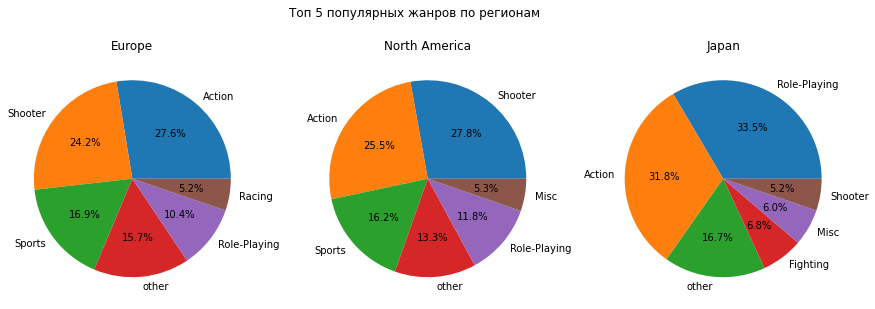

In [66]:
plt.suptitle('Топ 5 популярных жанров по регионам', fontsize="large")


plt.subplot(1, 3, 1)
eu_genre.plot.pie(figsize=(15,5), autopct="%.1f%%", ylabel='', title='Europe')

plt.subplot(1, 3, 2)
na_genre.plot.pie(figsize=(15,5), autopct="%.1f%%", ylabel='', title='North America')

plt.subplot(1, 3, 3)
jp_genre.plot.pie(figsize=(15,5), autopct="%.1f%%", ylabel='', title='Japan');

***Как мы видим, доля всех жанров не входящих в топ 5, колеблится от 13% до 17%.***

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [67]:
actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').\
sort_values(by = 'na_sales',ascending=False)

,na_sales
rating,
M,96.42
no info,64.72
E,50.74
T,38.95
E10+,33.23


***В Америке наиболее популярны игры рейтинга М(17+). Следом идут игры без возрастных ограничений Е. Замыкают список игры с возрастным ограничеснием Т(13+) и игры для детей Е10+ (дети старше 10 лет). ***

In [68]:
actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').\
sort_values(by = 'eu_sales',ascending=False)

,eu_sales
rating,
M,93.44
no info,58.95
E,58.06
T,34.07
E10+,26.16


***В Европе ситуация идентичная.***

In [69]:
actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').\
sort_values(by = 'jp_sales',ascending=False)

,jp_sales
rating,
no info,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


***В Японии, в топе, идут игры с детским рейтингом. Игры с рейтингом М значительно отстают в продажах.***

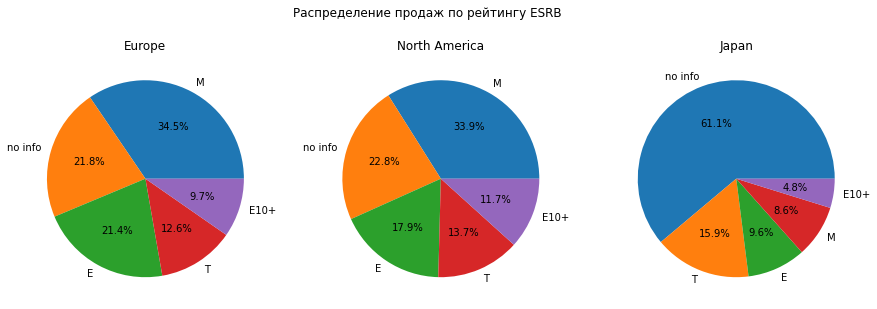

In [70]:
plt.suptitle('Распределение продаж по рейтингу ESRB', fontsize="large")


plt.subplot(1, 3, 1)
actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).\
plot.pie(figsize=(15,5), autopct="%.1f%%", ylabel='', title='Europe')

plt.subplot(1, 3, 2)
actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False).\
plot.pie(figsize=(15,5), autopct="%.1f%%", ylabel='', title='North America')

plt.subplot(1, 3, 3)
actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).\
plot.pie(figsize=(15,5), autopct="%.1f%%", ylabel='', title='Japan');

***Как видно из диаграммы, в Японии продажи игр без рейтинга составляют 61%, тогда как в Европе и Америка 22%. Это можно связать с тем, что ESRB это американское рейтинговое агентство, и возможно в Японии не обязательно использовать их рейтинги при создании игр. Вероятнее всего у них есть свое агентство, которое это курирует.***

***Краткий вывод:***
- Портреты пользователей для Америки и Европы очень похожи. В обоих случаях большинство игроков предпочитают PS4 или XOne. Наиболее популярные жанры это Shooter, Action и Sports. Самые популярные игры в рейтинег М(17+).
- Портрет пользователей Японии отличается. Там преобладают мобильны платформы - топ: 3DS, хотя PS4 и PSV так же достаточно популярны. Так же отличаются предпочтения в жанрах, преобладают Action и RPG. В Японии рейтинги ESRB не влияют на продажи. По рейтингам ESRB преобладают игры c детскими рейтингами.

## Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Проверка гипотезы: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

```
H_0: Cредние пользовательские рейтинги платформы Xbox One = средние пользовательские рейтинги платформы PC`
H_a: Cредние пользовательские рейтинги платформы Xbox One ≠ средние пользовательские рейтинги платформы PC
alpha = 0.05
```

In [71]:
rating = actual.dropna(subset=['user_score'])

In [72]:
xone_rating = rating[rating['platform']=='XOne']
pc_rating = rating[rating['platform']=='PC']


In [73]:
results = st.ttest_ind (xone_rating['user_score'], pc_rating['user_score'])  
alpha = .05

print (results.pvalue)  
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


***P-value больше альфа.Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ одинаковые.***

### Средние пользовательские рейтинги жанров Action и Sports разные.

Проверка гипотезы: cредние пользовательские рейтинги жанров Action и Sports разные

```
H_0: cредние пользовательские рейтинги жанра Action = cредние пользовательские рейтинги жанра Sports
H_a: cредние пользовательские рейтинги жанра Action ≠ cредние пользовательские рейтинги жанра Sports
alpha = 0.05
```

In [74]:
action_rating = rating[rating['genre']=='Action']
sports_rating = rating[rating['genre']=='Sports']

In [75]:
results = st.ttest_ind (sports_rating['user_score'], action_rating['user_score'])  
alpha = .05

print (results.pvalue)  
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

2.8711147985105864e-19
Отвергаем нулевую гипотезу


***P-value меньше альфа, соответственно отвергаем нулевую гипотезу, и принимаем альтернативную. Cредние пользовательские рейтинги разыне.***

## Общий вывод

- В ходе проделанной работы мы изучили общую информацию, произвели предобработку данных. Обработали пропущенные значения там, где это было возможно, заменили типы данных. 
- Провели исследовательский анализ, в ходе которого были выявлены следующие показатели:
 - Пик продаж приходиться на 2008-2009г. 
 - За все время наблюдений, больше всего продаж приходится на платформы PS2, Х360, PS3, Wii, DS и PS. Они значительно опережат все другие платформы по продажам.
 - Выяснили, что продолжительность жизни платформы в среднем составляет 10 лет, после чего она обновляется.
 - Из динамики роста\падения продаж по платформам, за последние несколько лет, выбрали наиболее прибыльные платформы. Это PS4, XOne, 3DS, PC и WiiU.
 - Выяснили, что для платформ PS4, XOne, 3DS, PC отзывы пользователей напрямую не влияют на количество продаж. Отзывы критиков оказывают умеренное влияние для всех кроме PC, там влияние выражено слабо. Для WiiU все отзывы оказывают умеренное влияние на продажи.
 - Выявили самые прибыльные жанры игр. Это оказались Action, Shooter,Sports и RPG. Так же стоит отметить, что отношение продаж к выпущенным играм самое большое у Shooter и Sports, а Action отстает от них. Это может говорить о том, что конкуренция в жанре Action высока, и для высоких продаж нужно делать качественные продукты.
- Выявили определяющие успешность игры закономерности: 

    Для региона EU\NA:
    - Плтаформы PS4 и XOne
    - Жанры Shooter, Action, Sports и RPG.
    - Игры с возрастным рейтингом М(17+) 
    
    Для региона JP:
    - Плтаформы 3DS, PS4 и PSV
    - Жанры Action и RPG.
    - Рейтинг ESRB в Японии не катируется. Лишь 40% от всех продаж идут с рейтингом. И большая часть из них с детским рейтингом. 
    
- Проверили гипотезы.